# <b> Logistic Regression </b>
___

<b> Table of Content: </b>
<br> [Pipeline_1](#8000)
<br> [Pipeline 2](#8010)
<br> [Pipeline 3](#8020)

Loading Modules and Datasets

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# import necessary packages  
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

<a id = "8000"> <h2> Pipeline 1 </h2> </a>
___

In [8]:
# read csv file to a pandas dataframe
df_pipeline1 = pd.read_csv("pipeline_1.csv")

> Declare features and target

In [9]:
# show all columns in dataset
list(df_pipeline1.columns)[:]

['Q4',
 'VisitorType_New_Visitor',
 'Q3',
 'TrafficType_2',
 'TrafficType_8',
 'TrafficType_3',
 'PageValues_iqr_yj_zscore',
 'Q1',
 'TrafficType_13',
 'ExitRates_iqr_yj_zscore',
 'OperatingSystems_3',
 'Administrative_Duration_iqr_yj_zscore',
 'TrafficType_1',
 'SpecialDay_0.8',
 'Month_Feb',
 'Browser_6',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Informational_Duration_pp_iqr_yj_zscore',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

In [11]:
# ---------------------------------------------------------------------------------------------------
# Extract needed features as a list of columns 
# excluding target variable 'Revenue' and original object features (that were labelencoded), namely 'Month' and VisitorType'
# ---------------------------------------------------------------------------------------------------
## create a list of all the columns
list_all_columns = df_pipeline1.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
list_remove_features = ['Month', 'VisitorType', 'Revenue'] 

# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_features)

# Get new set with elements that are only in a but not in b
setlist_X_columns = setA.difference(list_remove_features)

# convert set object to a list
list_X_columns = list(setlist_X_columns)

# Define dependent variables
X = df_pipeline1[list_X_columns].to_numpy()

#show the columns that need to be included as features
## sort alphabetically
list_X_columns.sort()
## show list 
list_X_columns

['Administrative_Duration_iqr_yj_zscore',
 'Browser_12',
 'Browser_6',
 'ExitRates_iqr_yj_zscore',
 'Informational_Duration_pp_iqr_yj_zscore',
 'Month_Feb',
 'OperatingSystems_3',
 'OperatingSystems_7',
 'PageValues_iqr_yj_zscore',
 'Q1',
 'Q3',
 'Q4',
 'SpecialDay_0.4',
 'SpecialDay_0.8',
 'TrafficType_1',
 'TrafficType_13',
 'TrafficType_16',
 'TrafficType_2',
 'TrafficType_20',
 'TrafficType_3',
 'TrafficType_8',
 'VisitorType_New_Visitor']

In [12]:
# Define Features and Target variables
X = df_pipeline1[list_X_columns]
Y = df_pipeline1['Revenue']

> Split the data

In [13]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

> Model Development and Prediction

In [14]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

> Model Evaluation Using Confusion Matrix

In [15]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2942,  189],
       [ 240,  328]])

> Vizualizing Confusion Matrix Using Heatmap

In [16]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

Text(0.5,257.44,'Predicted label')

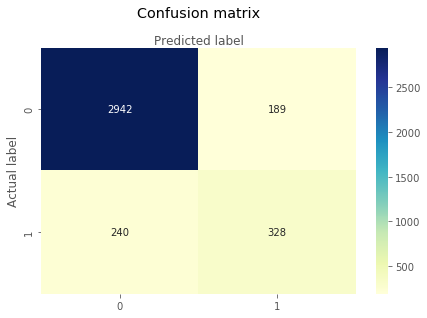

In [17]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

> Confusion Matrix Evaluation

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.884022708840227
Precision: 0.6344294003868471
Recall: 0.5774647887323944


> ROC Curve

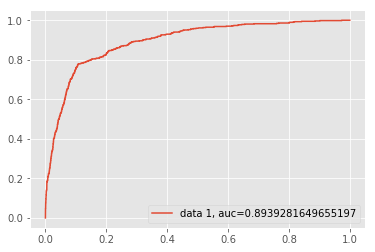

In [19]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

target_names = ['0', '1']

# print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3131
           1       0.63      0.58      0.60       568

    accuracy                           0.88      3699
   macro avg       0.78      0.76      0.77      3699
weighted avg       0.88      0.88      0.88      3699



<a id = "8010"> <h2> Pipeline 2 </h2> </a>
___

In [21]:
# read csv file to a pandas dataframe
df_pipeline2 = pd.read_csv("pipeline_2.csv")

> Declare features and target

In [22]:
# show all columns in dataset
list(df_pipeline2.columns)[:]

['TrafficType_15',
 'Month_Nov',
 'Administrative_Duration_mm_yj_stdev',
 'VisitorType_New_Visitor',
 'Informational_mm_yj_stdev',
 'TrafficType_2',
 'TrafficType_3',
 'ProductRelated_mm_yj_stdev',
 'PageValues_mm_yj_stdev',
 'Month_May',
 'TrafficType_13',
 'OperatingSystems_3',
 'TrafficType_1',
 'add_exit_bounce_rates_mm_yj_stdev',
 'Month_Mar',
 'TrafficType_18',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'TrafficType_12',
 'Browser_12',
 'Revenue']

In [23]:
# ---------------------------------------------------------------------------------------------------
# Extract needed features as a list of columns 
# excluding target variable 'Revenue' and original object features (that were labelencoded), namely 'Month' and VisitorType'
# ---------------------------------------------------------------------------------------------------
## create a list of all the columns
list_all_columns = df_pipeline2.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
list_remove_features = ['Month', 'VisitorType', 'Revenue'] 

# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_features)

# Get new set with elements that are only in a but not in b
setlist_X_columns = setA.difference(list_remove_features)

# convert set object to a list
list_X_columns = list(setlist_X_columns)

# Define dependent variables
X = df_pipeline2[list_X_columns].to_numpy()

#show the columns that need to be included as features
## sort alphabetically
list_X_columns.sort()
## show list 
list_X_columns

['Administrative_Duration_mm_yj_stdev',
 'Browser_12',
 'Informational_mm_yj_stdev',
 'Month_Feb',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'OperatingSystems_3',
 'PageValues_mm_yj_stdev',
 'ProductRelated_mm_yj_stdev',
 'SpecialDay_0.8',
 'TrafficType_1',
 'TrafficType_12',
 'TrafficType_13',
 'TrafficType_15',
 'TrafficType_18',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_8',
 'VisitorType_New_Visitor',
 'add_exit_bounce_rates_mm_yj_stdev']

In [24]:
# Define Features and Target variables
X = df_pipeline2[list_X_columns]
Y = df_pipeline2['Revenue']

> Split the data

In [25]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

> Model Development and Prediction

In [26]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

> Model Evaluation Using Confusion Matrix

In [27]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[3129,    2],
       [ 562,    6]])

> Vizualizing Confusion Matrix Using Heatmap

In [28]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

Text(0.5,257.44,'Predicted label')

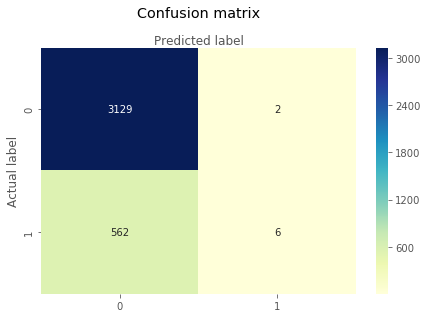

In [29]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

> Confusion Matrix Evaluation

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8475263584752636
Precision: 0.75
Recall: 0.01056338028169014


> ROC Curve

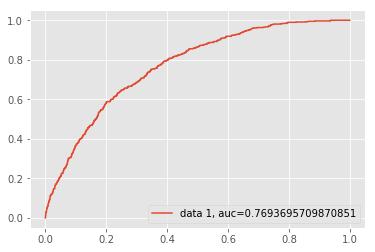

In [31]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

target_names = ['0', '1']

# print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3131
           1       0.75      0.01      0.02       568

    accuracy                           0.85      3699
   macro avg       0.80      0.50      0.47      3699
weighted avg       0.83      0.85      0.78      3699



<a id = "8020"> <h2> Pipeline 3 </h2> </a>
___

In [34]:
# read csv file to a pandas dataframe
df_pipeline3 = pd.read_csv("pipeline_3.csv")

> Declare features and target

In [35]:
# show all columns in dataset
list(df_pipeline3.columns)[:]

['Administrative_yj_stdev_zscore',
 'Month_Nov',
 'VisitorType_New_Visitor',
 'TrafficType_2',
 'Month_May',
 'TrafficType_3',
 'add_exit_bounce_rates_yj_stdev_zscore',
 'TrafficType_13',
 'PageValues_yj_stdev_zscore',
 'OperatingSystems_3',
 'TrafficType_1',
 'Month_Mar',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'Month_Dec',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Month_Oct',
 'Region_1',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

In [37]:
# ---------------------------------------------------------------------------------------------------
# Extract needed features as a list of columns 
# excluding target variable 'Revenue' and original object features (that were labelencoded), namely 'Month' and VisitorType'
# ---------------------------------------------------------------------------------------------------
## create a list of all the columns
list_all_columns = df_pipeline3.columns.tolist()

## remove features in list, which are not needed for testing for feature selection, namely:
list_remove_features = ['Month', 'VisitorType', 'Revenue'] 

# Create sets of a,b
setA = set(list_all_columns)
setB = set(list_remove_features)

# Get new set with elements that are only in a but not in b
setlist_X_columns = setA.difference(list_remove_features)

# convert set object to a list
list_X_columns = list(setlist_X_columns)

# Define dependent variables
X = df_pipeline3[list_X_columns].to_numpy()

#show the columns that need to be included as features
## sort alphabetically
list_X_columns.sort()
## show list 
list_X_columns

['Administrative_yj_stdev_zscore',
 'Browser_12',
 'Month_Dec',
 'Month_Feb',
 'Month_Mar',
 'Month_May',
 'Month_Nov',
 'Month_Oct',
 'OperatingSystems_3',
 'OperatingSystems_7',
 'PageValues_yj_stdev_zscore',
 'Region_1',
 'SpecialDay_0.4',
 'SpecialDay_0.8',
 'TrafficType_1',
 'TrafficType_13',
 'TrafficType_16',
 'TrafficType_2',
 'TrafficType_20',
 'TrafficType_3',
 'TrafficType_8',
 'VisitorType_New_Visitor',
 'add_exit_bounce_rates_yj_stdev_zscore']

In [38]:
# Define Features and Target variables
X = df_pipeline3[list_X_columns]
Y = df_pipeline3['Revenue']

> Split the data

In [39]:
# Split dataset into training set and test set 
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=2019) 

> Model Development and Prediction

In [40]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=100)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

> Model Evaluation Using Confusion Matrix

In [41]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[2962,  169],
       [ 240,  328]])

> Vizualizing Confusion Matrix Using Heatmap

In [42]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

Text(0.5,257.44,'Predicted label')

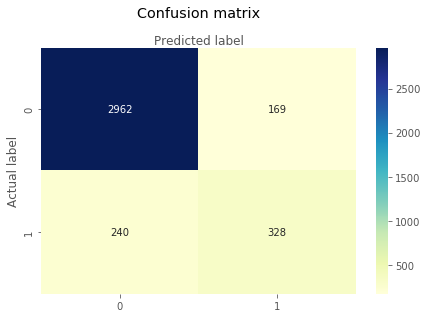

In [43]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

> Confusion Matrix Evaluation

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8894295755609625
Precision: 0.6599597585513078
Recall: 0.5774647887323944


> ROC Curve

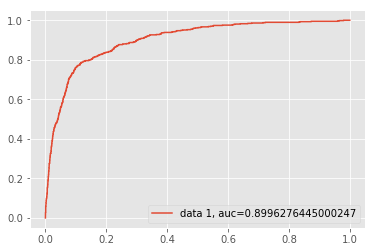

In [45]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

target_names = ['0', '1']

# print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3131
           1       0.66      0.58      0.62       568

    accuracy                           0.89      3699
   macro avg       0.79      0.76      0.78      3699
weighted avg       0.88      0.89      0.89      3699

